In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
renames_policy = {"main": "fullprogram", "fineq": "fin_inflow"}
df_base = pd.read_csv("perfs_base.csv").rename(renames_policy, axis=1)
df_cupy = pd.read_csv("perfs_cupy.csv").rename(renames_policy, axis=1)
df_numba = pd.read_csv("perfs_numba.csv").rename(renames_policy, axis=1)

assert len(df_base) == len(df_cupy)
assert len(df_base) == len(df_numba)

In [3]:
columns = ["fullprogram", "equilibrium", "collision", "streaming", "macroscopic",
          "rightwall", "leftwall", "fin_inflow", "bounceback"]
for col in columns:
    new_name = col + "_speedup"
    df_base[new_name] = df_base[col] / df_base[col]
    df_cupy[new_name] = df_base[col] / df_cupy[col]
    df_numba[new_name] = df_base[col] / df_numba[col] 
display(df_base.head(5))
display(df_cupy.head(5))
show=False

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,bounceback,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,base,2000.0,500.0,300.0,47.34,14.699346,8.102,4.414,6.028,0.03180,...,13.816,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,base,2000.0,750.0,300.0,72.51,23.751870,11.828,6.406,9.692,0.03240,...,20.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,base,2000.0,1000.0,300.0,99.70,34.717350,15.722,8.356,13.398,0.03384,...,27.180,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,base,2000.0,1250.0,300.0,126.40,45.162570,19.102,10.322,17.706,0.03346,...,33.820,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,base,2000.0,1500.0,300.0,154.40,55.427700,22.460,12.586,23.060,0.03440,...,40.540,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,bounceback,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,cupy,2000.0,500.0,300.0,8.753,2.633316,0.08180,1.4402,0.8860,0.2246,...,2.186,5.408431,5.582067,99.046455,3.064852,6.803612,0.141585,0.194423,0.101286,6.320220
1,cupy,2000.0,750.0,300.0,8.653,2.603301,0.08006,1.4268,0.8712,0.2222,...,2.154,8.379753,9.123751,147.739196,4.489767,11.124885,0.145815,0.240061,0.104704,9.517177
2,cupy,2000.0,1000.0,300.0,9.556,2.611305,0.08028,1.5494,0.8762,0.2220,...,2.916,10.433236,13.295019,195.839562,5.393055,15.291029,0.152432,0.253094,0.111200,9.320988
3,cupy,2000.0,1250.0,300.0,9.155,2.585292,0.07970,1.5208,0.8728,0.2240,...,2.576,13.806663,17.469040,239.673777,6.787217,20.286434,0.149375,0.259700,0.114804,13.128882
4,cupy,2000.0,1500.0,300.0,9.192,2.587293,0.07972,1.5240,0.8692,0.2224,...,2.610,16.797215,21.423047,281.736076,8.258530,26.530143,0.154676,0.279071,0.122032,15.532567


## Speedup as a function of nx

In [4]:
nx_base = df_base[(df_base["iter"] == 2000) & (df_base["ny"] == 300) & (df_base["nx"] != 420)].sort_values("nx")
nx_cupy = df_cupy[(df_cupy["iter"] == 2000) & (df_cupy["ny"] == 300) & (df_cupy["nx"] != 420)].sort_values("nx")
nx_numba = df_numba[(df_numba["iter"] == 2000) & (df_numba["ny"] == 300) & (df_numba["nx"] != 420)].sort_values("nx")

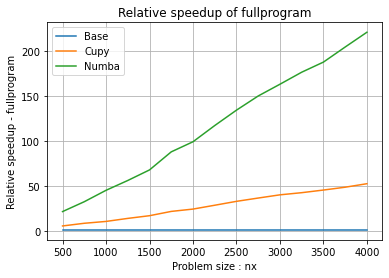

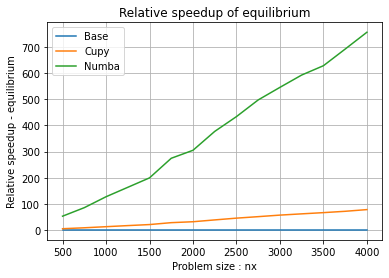

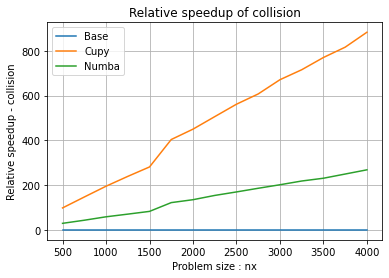

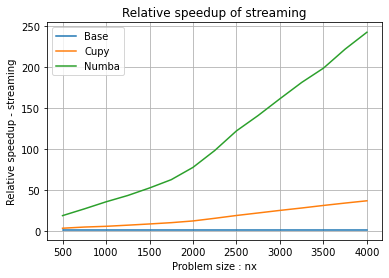

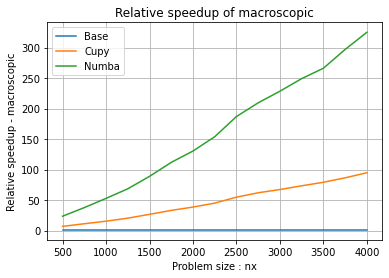

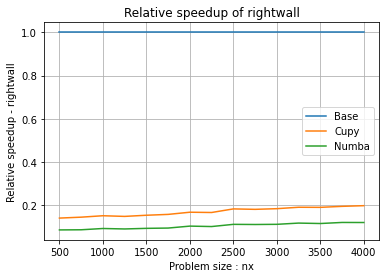

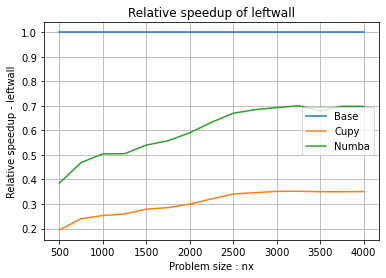

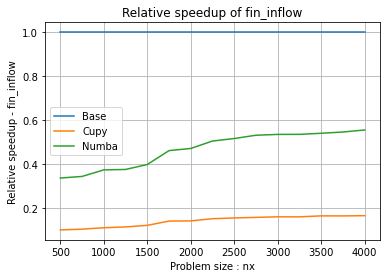

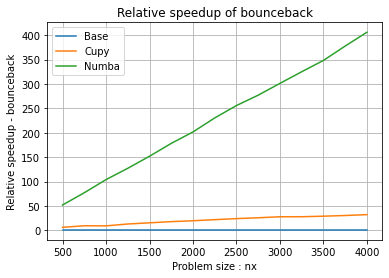

In [5]:
for col in columns:
    fig = plt.figure()
    plt.plot(nx_base["nx"], nx_base[col+"_speedup"], label="Base")
    plt.plot(nx_cupy["nx"], nx_cupy[col+"_speedup"], label="Cupy")
    plt.plot(nx_numba["nx"], nx_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : nx")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/nx_comparison_{col}.png")

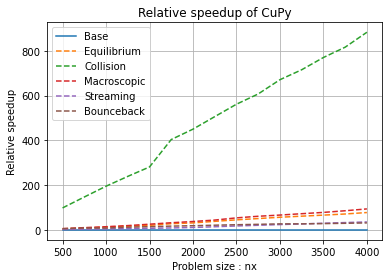

In [6]:
plt.plot(nx_base["nx"], nx_base["fullprogram_speedup"], label="Base")
plt.plot(nx_cupy["nx"], nx_cupy["equilibrium_speedup"], label="Equilibrium", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["collision_speedup"], label="Collision", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["macroscopic_speedup"], label="Macroscopic", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["streaming_speedup"], label="Streaming", linestyle="dashed")
plt.plot(nx_cupy["nx"], nx_cupy["bounceback_speedup"], label="Bounceback", linestyle="dashed")
plt.legend()
plt.xlabel("Problem size : nx")
plt.ylabel("Relative speedup")
plt.title("Relative speedup of CuPy")
plt.grid()
plt.show()

## Speedup as a function of ny

In [7]:
ny_base = df_base[(df_base["iter"] == 2000) & (df_base["nx"] == 420) & (df_base["ny"] != 300)].sort_values("ny")
ny_cupy = df_cupy[(df_cupy["iter"] == 2000) & (df_cupy["nx"] == 420) & (df_cupy["ny"] != 300)].sort_values("ny")
ny_numba = df_numba[(df_numba["iter"] == 2000) & (df_numba["nx"] == 420) & (df_numba["ny"] != 300)].sort_values("ny")

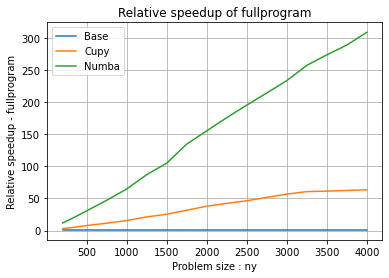

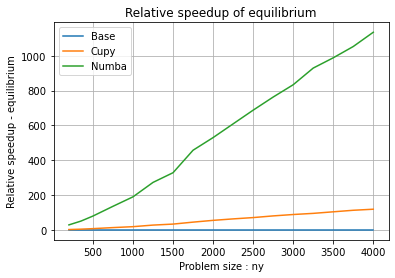

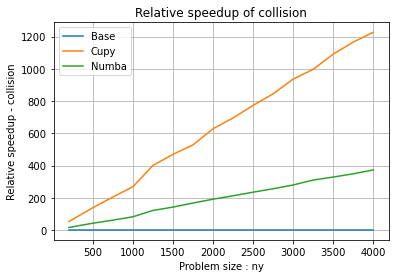

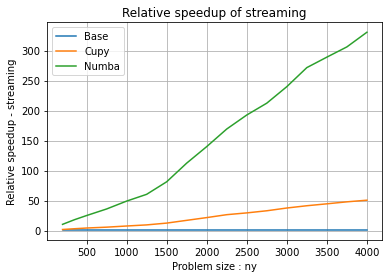

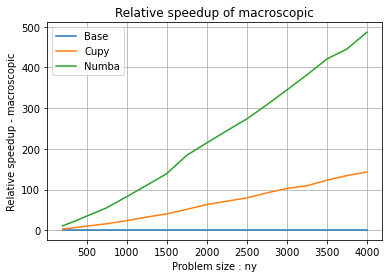

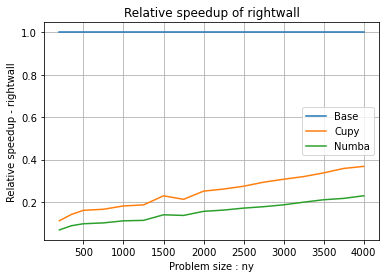

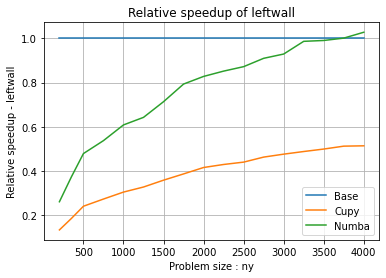

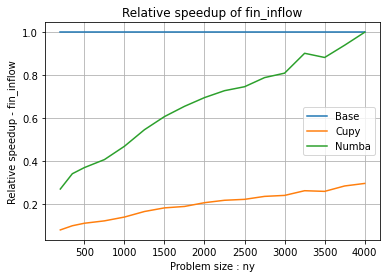

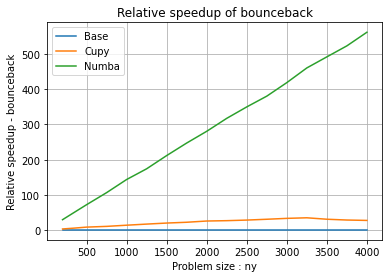

In [8]:
for col in columns:
    fig = plt.figure()
    plt.plot(ny_base["ny"], ny_base[col+"_speedup"], label="Base")
    plt.plot(ny_cupy["ny"], ny_cupy[col+"_speedup"], label="Cupy")
    plt.plot(ny_numba["ny"], ny_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : ny")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/ny_comparison_{col}.png")

In [9]:
ny_base

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,bounceback,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
15,base,2000.0,420.0,200.0,25.92,8.230113,4.230,2.460,2.854,0.02528,...,7.934,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16,base,2000.0,420.0,350.0,45.71,14.077035,7.856,4.310,5.688,0.03228,...,13.502,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
17,base,2000.0,420.0,500.0,67.43,21.930960,11.270,5.926,8.880,0.03550,...,19.106,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
18,base,2000.0,420.0,750.0,105.30,37.398690,16.426,8.584,14.196,0.03716,...,28.300,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
19,base,2000.0,420.0,1000.0,143.80,51.645810,21.760,11.560,20.900,0.04024,...,37.520,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
20,base,2000.0,420.0,1250.0,197.70,75.157560,32.500,14.474,28.440,0.04136,...,46.700,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
21,base,2000.0,420.0,1500.0,240.00,90.365160,38.040,19.468,35.740,0.05096,...,55.940,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
22,base,2000.0,420.0,1750.0,308.90,125.142540,44.420,26.700,47.060,0.04952,...,65.080,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
23,base,2000.0,420.0,2000.0,360.30,145.892910,51.060,33.420,55.120,0.05660,...,74.280,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
24,base,2000.0,420.0,2250.0,410.70,167.043480,56.460,40.320,62.740,0.05866,...,83.500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## Speedup as a function of iter

In [10]:
iter_base = df_base[(df_base["iter"] != 2000) & (df_base["nx"] == 420) & (df_base["ny"] == 300)].sort_values("iter")
iter_cupy = df_cupy[(df_cupy["iter"] != 2000) & (df_cupy["nx"] == 420) & (df_cupy["ny"] == 300)].sort_values("iter")
iter_numba = df_numba[(df_numba["iter"] != 2000) & (df_numba["nx"] == 420) & (df_numba["ny"] == 300)].sort_values("iter")

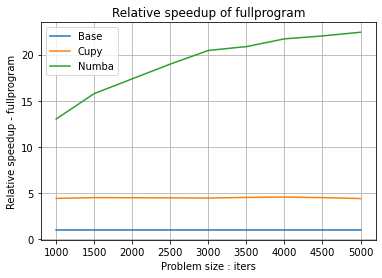

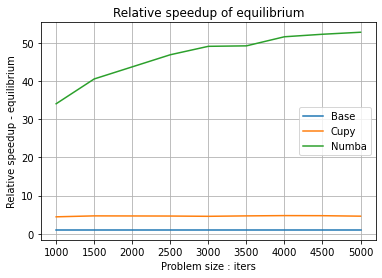

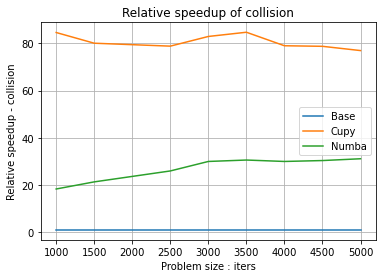

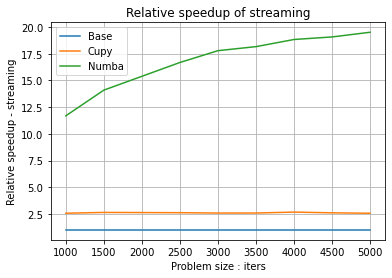

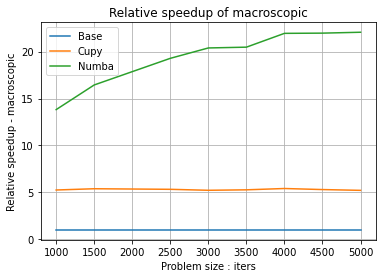

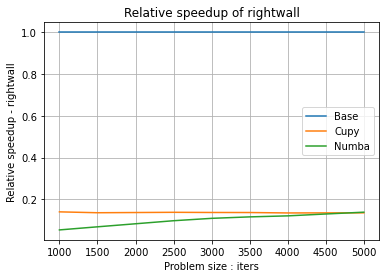

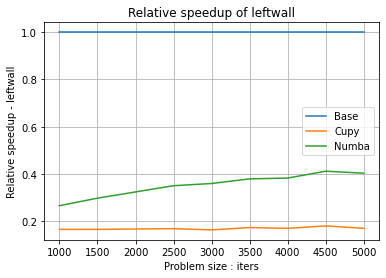

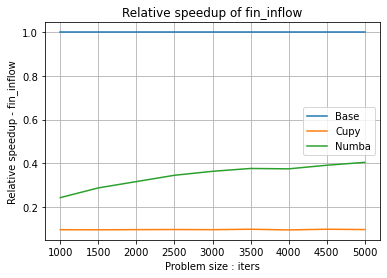

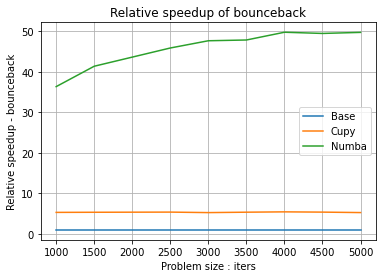

In [11]:
for col in columns:
    fig = plt.figure()
    plt.plot(iter_base["iter"], iter_base[col+"_speedup"], label="Base")
    plt.plot(iter_cupy["iter"], iter_cupy[col+"_speedup"], label="Cupy")
    plt.plot(iter_numba["iter"], iter_numba[col+"_speedup"], label="Numba")
    plt.legend()
    plt.xlabel("Problem size : iters")
    plt.ylabel(f"Relative speedup - {col}")
    plt.title(f"Relative speedup of {col}")
    plt.grid()
    if show:
        plt.show()
    else:
        plt.savefig(f"figures/iter_comparison_{col}.png")

In [12]:
nx_numba

,algo,iter,nx,ny,fullprogram,equilibrium,collision,streaming,macroscopic,rightwall,...,gflops_bounceback,fullprogram_speedup,equilibrium_speedup,collision_speedup,streaming_speedup,macroscopic_speedup,rightwall_speedup,leftwall_speedup,fin_inflow_speedup,bounceback_speedup
0,numba,2000.0,500.0,300.0,2.214,0.2754,0.2670,0.2394,0.2574,0.3658,...,14.697,21.382114,53.374532,30.344569,18.437761,23.418803,0.086933,0.385049,0.337158,52.057272
1,numba,2000.0,750.0,300.0,2.241,0.2766,0.2676,0.2404,0.2580,0.3700,...,22.027,32.356091,85.870824,44.200299,26.647255,37.565891,0.087568,0.469162,0.344434,77.183735
2,numba,2000.0,1000.0,300.0,2.214,0.2722,0.2644,0.2368,0.2542,0.3620,...,29.869,45.031617,127.543534,59.462935,35.287162,52.706530,0.093481,0.504262,0.374167,104.058193
3,numba,2000.0,1250.0,300.0,2.259,0.2762,0.2676,0.2400,0.2590,0.3662,...,36.685,55.953962,163.514012,71.382661,43.008333,68.362934,0.091371,0.505015,0.376156,127.238525
4,numba,2000.0,1500.0,300.0,2.281,0.2778,0.2686,0.2412,0.2598,0.3654,...,43.867,67.689610,199.523758,83.618764,52.180763,88.760585,0.094143,0.540297,0.398644,151.949025
5,numba,2000.0,1750.0,300.0,2.266,0.2742,0.2656,0.2388,0.2564,0.3638,...,51.623,87.775816,274.316521,122.740964,62.311558,111.700468,0.095492,0.557692,0.461883,178.290469
6,numba,2000.0,2000.0,300.0,2.294,0.2766,0.2676,0.2404,0.2586,0.3638,...,58.471,98.997384,304.779935,135.724963,77.312812,130.317092,0.104508,0.590555,0.471636,201.724138
7,numba,2000.0,2250.0,300.0,2.268,0.2704,0.2630,0.2358,0.2526,0.3596,...,66.922,117.019400,376.815533,154.752852,97.879559,153.760887,0.102503,0.633079,0.505443,230.434783
8,numba,2000.0,2500.0,300.0,2.300,0.2744,0.2658,0.2380,0.2558,0.3630,...,74.392,134.130435,433.306924,170.353649,121.848739,186.864738,0.112617,0.669917,0.516866,255.835240
9,numba,2000.0,2750.0,300.0,2.331,0.2766,0.2674,0.2400,0.2586,0.3660,...,80.634,149.892750,496.922234,186.686612,140.666667,209.358082,0.111967,0.684459,0.531718,277.067669


## Bandwidths and Gflops

In [13]:
from parselogs import parse_file
parse_file("logs/", "numba", "numba_run_nx5000_ny5000_i5000.log")

Parsing numba_run_nx5000_ny5000_i5000.log


algo                      numba
iter                       5000
nx                         5000
ny                         5000
main                      8.971
equilibrium               0.573
collision                 0.508
streaming                0.4824
macroscopic               0.529
rightwall                0.5545
leftwall                  0.554
fin_inflow              0.44475
bounceback                0.586
bdwdth_equilibrium    34902.102
bdwdth_collision      70839.791
bdwdth_streaming      37315.154
bdwdth_macroscopic    20799.866
bdwdth_rightwall          4.329
bdwdth_leftwall           3.973
bdwdth_fin_inflow         5.396
bdwdth_bounceback     30723.325
gflops_equilibrium    23122.641
gflops_collision       7379.145
gflops_streaming      28763.763
gflops_macroscopic    15599.898
gflops_rightwall          0.271
gflops_leftwall           0.451
gflops_fin_inflow         0.393
gflops_bounceback      2773.634
dtype: object

In [14]:
df_numba[(df_numba["ny"] == idx.loc["ny"]) & (df_numba["nx"] == idx.loc["nx"])]

NameError: name 'idx' is not defined